# Car Price Prediction
by Mahlatsi Malise Mashilo

The goal of this project is to create a machine learning model that accurately predicts car prices based on various features. Additionally, you'll develop a dashboard for data visualization and a website for real-time car price prediction.

# Data Preprocessing

## 1. Install Packages

Install packages that are needed to run the script.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import joblib
import streamlit as st

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold, learning_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn import metrics
from prettytable import PrettyTable
from category_encoders import TargetEncoder
from sklearn.decomposition import PCA


# Models
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, RFE, chi2
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

## 2. Data Description

The "CarDekho Dataset" has 13 columns which speaks to the characteristics of each of the 15411 cars entered into the dataframe.
Below is a description of each of the columns:

+ Car Name - The specific name of the vehicle
+ Brand - The brand of the vehicle
+ Model - The specific model name of the car
+ Vehicle Age - The year the vehicle was produced (yrs)
+ KM Driven - The number of kilometers the car has traveled (km)
+ Seller type - The type of seller the car is being sold by (Individual/Dealer/Trustmark Dealer)
+ Fuel Type - The fuel the car is using (Petrol/Diesel/CNG/LPG/Electric)
+ Transmission Type - The type of gearbox the vehicle has (Automatic/Manual)
+ Mileage - The Fuel Economy of the car (kmpl)
+ Engine - The size(Cubic Capacity) of the engine in (CC)
+ Max Power - The horsepower of the car after taking into consideration friction between a car's tyres and the road (bhp)
+ Seats - The total seats in the car
+ Selling Price - The selling price of the vehicle (R1 = Rs. 0.20809)

##### Abbreviation Description
- kmpl - Kilometers per liter
- CC - Cubic centimeters
- bhp - break horsepower
- CNG - Compressed Natural Gas
- LPG - Liquified Petrol
- Rs. - Indian Rupees

In [15]:
df = pd.read_csv("cardekho_dataset.csv", index_col = 'Unnamed: 0')
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [17]:
df.isna().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [18]:
# Converting from Indian Rupees to Rands
df['selling_price'].astype(float)
df['selling_price'] = df['selling_price'] * 0.21
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,25200.0
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,115500.0
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,45150.0
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,47460.0
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,119700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,52500.0
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,194250.0
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,89250.0
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,257250.0


In [19]:
# Converting max power from Hp to kW
df['max_power'].astype(float)
df['max_power'] = df['max_power'] / 1.341
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,34.526473,5,25200.0
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,61.148397,5,115500.0
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,59.656972,5,45150.0
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,50.037286,5,47460.0
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,73.519761,5,119700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,50.745712,5,52500.0
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,67.934377,7,194250.0
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,77.196122,5,89250.0
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,104.399702,7,257250.0


In [20]:
df.rename(columns={'mileage':'fuel_economy'}, inplace=True)
df['fuel_economy'] = 100 / df['fuel_economy']
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,fuel_economy,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,5.076142,796,34.526473,5,25200.0
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,5.291005,1197,61.148397,5,115500.0
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,5.882353,1197,59.656972,5,45150.0
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,4.780115,998,50.037286,5,47460.0
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,4.391744,1498,73.519761,5,119700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,5.047956,1086,50.745712,5,52500.0
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,5.714286,1373,67.934377,7,194250.0
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,4.730369,1498,77.196122,5,89250.0
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,6.250000,2179,104.399702,7,257250.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   fuel_economy       15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 1.6+ MB


## 3. Visualizations

### a. Univariate Analysis

#### (i) Numerical Features

##### Distribution

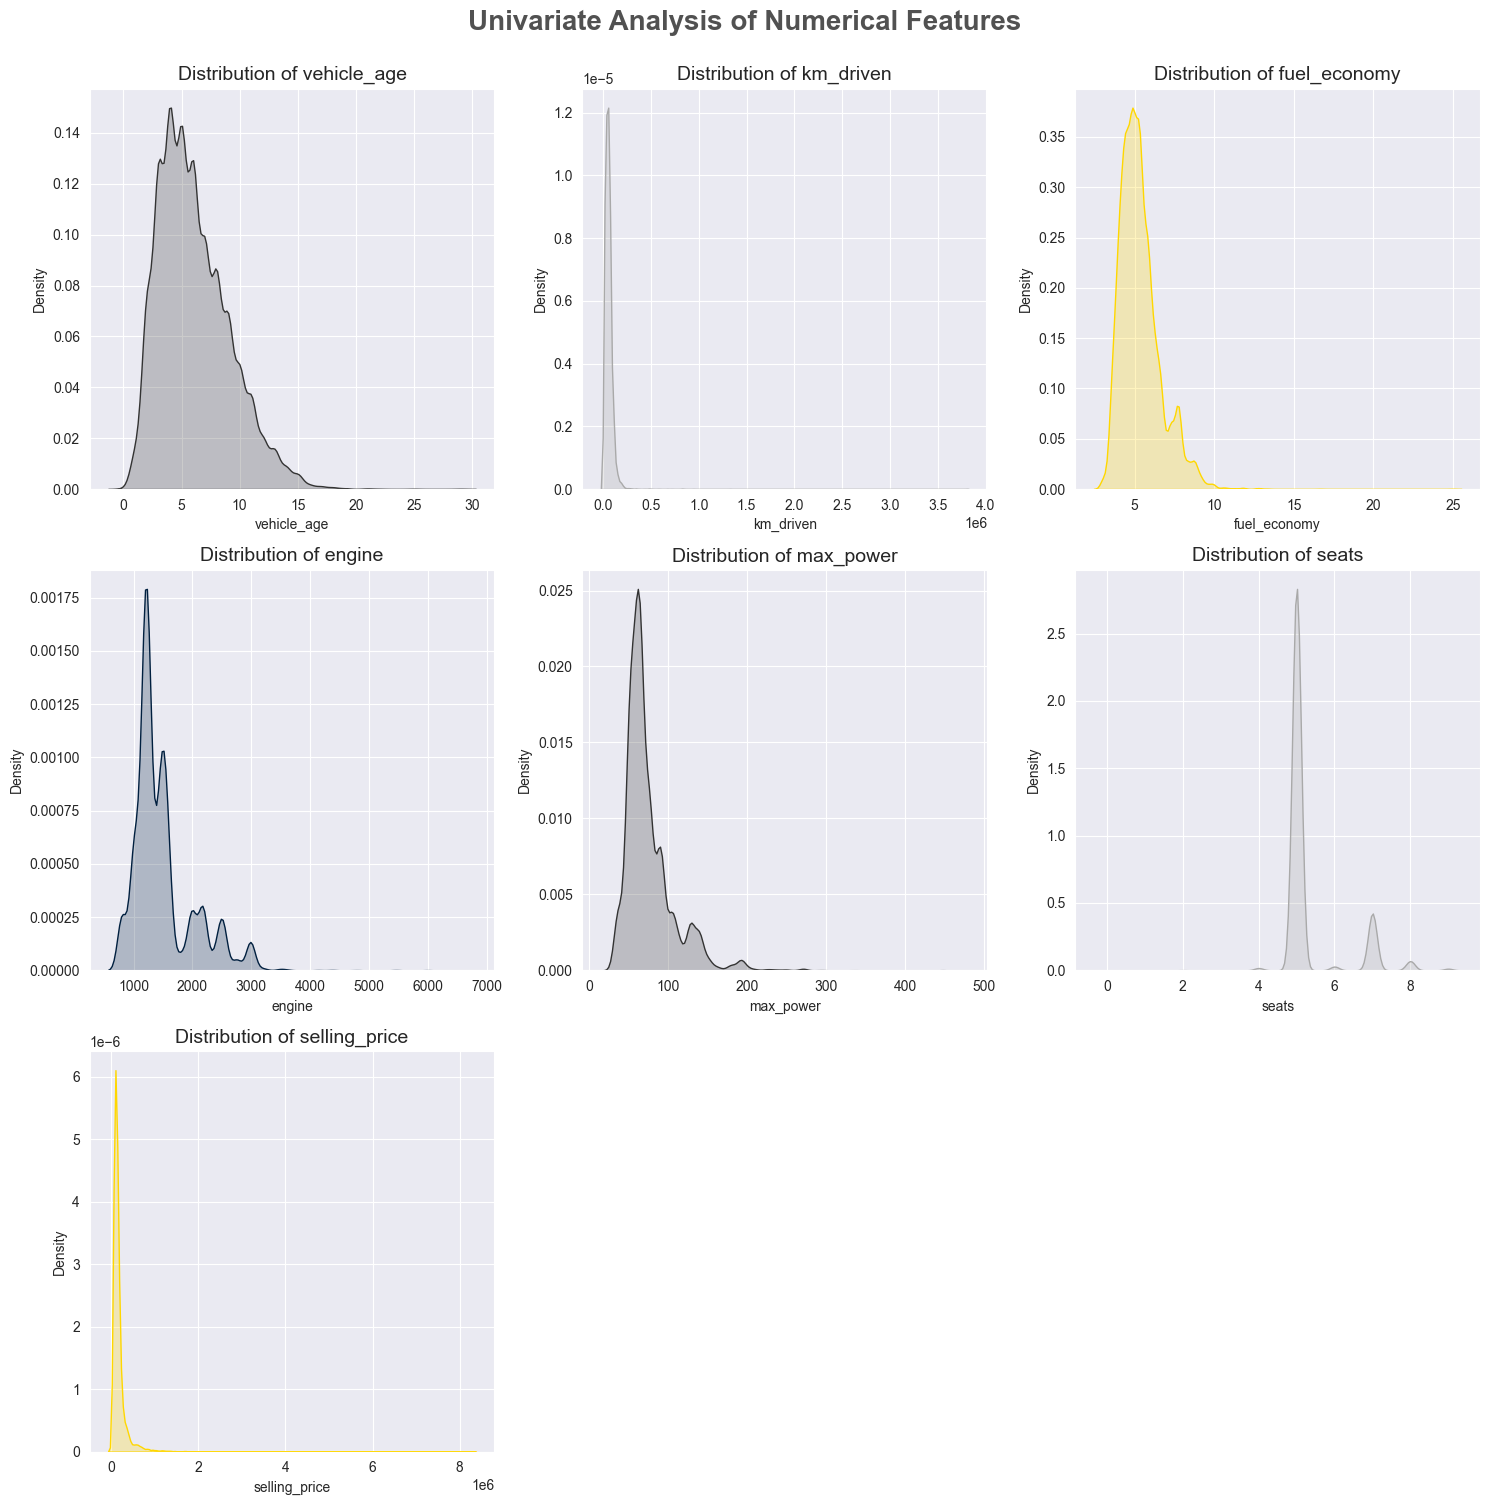

In [44]:
# Define your color palette
colors = ['#333333', '#A9A9A9', '#FFD700', '#001F3F']  # Charcoal, Gray, Gold, Deep Blue

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

numeric_features = df.select_dtypes(include=['float', 'integer']).columns

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i + 1)
    sns.kdeplot(x=df[numeric_features[i]], shade=True, color=colors[i % len(colors)])  # Use colors from the palette
    plt.xlabel(numeric_features[i])
    plt.title(f'Distribution of {numeric_features[i]}', fontsize=14)

plt.tight_layout()
plt.show()


Report:

+ All features shown above are Positively skewed (skewed to the right)
+ except for the seats feature which is mostly semmetrical and some outliers on the right

##### Average

In [45]:
def plot_avg_metrics(df):
    # Define the metrics and their corresponding properties with new colors
    metrics = [
        ('max_power', 'Average Max Power for Each Brand', 'Max Power', '#FFD700'),  # Gold
        ('selling_price', 'Average Selling Price for Each Brand', 'Selling Price', '#001F3F'),  # Deep Blue
        ('km_driven', 'Average Kilometers Driven for Each Brand', 'Kilometers Driven', '#A9A9A9'),  # Gray
        ('fuel_economy', 'Average Fuel Economy for Each Brand', 'Fuel Economy', '#333333'),  # Charcoal
        ('engine', 'Average Engine Size for Each Brand', 'Engine Size', '#FFD700')  # Reusing Gold
    ]

    # Create subplots
    fig = make_subplots(
        rows=3, cols=2,
        subplot_titles=[metric[1] for metric in metrics]
    )

    # Iterate over metrics and add bar charts to subplots
    for i, (metric, title, ylabel, color) in enumerate(metrics):
        row = i // 2 + 1
        col = i % 2 + 1

        avg_metric = df.groupby('brand')[metric].mean().reset_index().sort_values(by=metric, ascending=False)
        fig.add_trace(
            go.Bar(x=avg_metric['brand'], y=avg_metric[metric], name=title, marker_color=color),
            row=row, col=col
        )

    # Adjust the last row if the number of metrics is odd
    if len(metrics) % 2 != 0:
        fig.update_xaxes(visible=False, row=3, col=2)
        fig.update_yaxes(visible=False, row=3, col=2)

    # Update layout
    fig.update_layout(height=800, width=1200, title_text='Average Metrics for Each Brand', showlegend=False)

    # Show the figure
    fig.show()

# Call the function with your DataFrame
plot_avg_metrics(df)


##### Most Common cars

In [54]:
import plotly.express as px

# Replace 'Name' with 'model' column from your dataset
car_counts = df['car_name'].value_counts().head(10)  # Get top 10 most common car models

# Convert to DataFrame
car_counts_df = car_counts.reset_index()
car_counts_df.columns = ['Car Name', 'Frequency']

# Define custom color sequence from lightest to darkest
color_sequence = ['#FFD700', '#A9A9A9', '#333333', '#001F3F']  # Gold, Gray, Charcoal, Deep Blue

# Create bar plot using Plotly
fig = px.bar(car_counts_df, 
             x='Frequency', 
             y='Car Name', 
             color='Car Name',  # Add color based on car name
             orientation='h',  # Horizontal bar plot
             title='Top 10 Most Common Car Brands',
             color_discrete_sequence=color_sequence[:len(car_counts_df)])  # Use custom color sequence

# Update layout for better appearance
fig.update_layout(
    height=600,  # Adjust the height to fit long names
    margin=dict(l=150, r=50, t=50, b=50),  # Adjust left margin for longer names
    xaxis_title='Frequency',
    yaxis_title='Car Name',
    showlegend=False
)

# Show the plot
fig.show()


##### Most expensive Cars

In [57]:
import plotly.express as px

# Get the top 20 most expensive cars
top_20_expensive_cars = df.sort_values(by='selling_price', ascending=False).head(20)

# Define custom colors using the specified palette
custom_colors = ['#FFD700', '#333333', '#A9A9A9', '#001F3F']  # Gold, Charcoal, Gray, Deep Blue

# Create a horizontal bar plot using Plotly
fig = px.bar(top_20_expensive_cars, 
             x='selling_price', 
             y='car_name', 
             title='Top 20 Most Expensive Cars',
             orientation='h',
             color='selling_price', 
             color_continuous_scale=custom_colors)

# Update layout for better appearance
fig.update_layout(
    height=800,
    margin=dict(l=150, r=50, t=50, b=50),  # Adjust height to fit the names
    xaxis_title='Price',
    yaxis_title='Car Name',
    yaxis=dict(autorange='reversed')  # Reverse the y-axis to have the most expensive on top
)

# Show the figure
fig.show()


#### (ii) Categorical Features

In [58]:
def plot_categorical_counts(df, n, m):
    # Define the categories and their properties
    categories = [
        ('fuel_type', 'The Number of Cars for Each Fuel Type', 'Fuel Type'),
        ('seller_type', 'The Number of Cars under Each Seller Type', 'Seller Type'),
        ('transmission_type', 'The Number of Cars under Each Transmission Type', 'Transmission Type')
    ]

    # Create subplots based on the number of categories
    total_plots = len(categories)
    fig = make_subplots(
        rows=n, cols=m,
        subplot_titles=[title for _, title, _ in categories],
        vertical_spacing=0.15, horizontal_spacing=0.1
    )

    # Define the custom colors from the specified palette
    colors = ['#333333', '#A9A9A9', '#FFD700', '#001F3F']  # Charcoal, Gray, Gold, Deep Blue

    # Iterate over categories and add bar charts to subplots
    for i, (column, title, xlabel) in enumerate(categories):
        # Calculate counts and sort
        cat_df = df[column].value_counts().reset_index()
        cat_df.columns = [column, 'counts']

        # Determine the row and column position
        row, col = divmod(i, m)
        row += 1
        col += 1

        # Add the bar chart with explicit colors from the palette
        fig.add_trace(
            go.Bar(
                x=cat_df[column], 
                y=cat_df['counts'], 
                name=title,
                marker=dict(color=colors[i % len(colors)])  # Use colors from the palette
            ),
            row=row, col=col
        )

        # Update axis labels
        fig.update_xaxes(title_text=xlabel, row=row, col=col)
        fig.update_yaxes(title_text='Count', row=row, col=col)

    # Update layout dynamically based on the number of plots
    fig.update_layout(
        height=300 * n, width=400 * m,
        title_text='Categorical Count Metrics',
        showlegend=False,
        plot_bgcolor='white',  # Set background color
        paper_bgcolor='white'  # Set paper background color
    )

    # Show the figure
    fig.show()

# Call the function with your DataFrame
plot_categorical_counts(df, 2, 2)

### b. Relationship between Average Price and Average KM Driven

In [59]:
# Calculate average selling price per brand
avg_Price = df.groupby('brand')['selling_price'].mean().reset_index()

# Calculate average kilometers driven per brand
avg_km_driven = df.groupby('brand')['km_driven'].mean().reset_index()

# Calculate the count of cars per brand for point size
car_counts = df['brand'].value_counts().reset_index()
car_counts.columns = ['brand', 'count']

# Merge the three dataframes on the 'brand' column
combined_avg_df = pd.merge(avg_Price, avg_km_driven, on="brand")
combined_avg_df = pd.merge(combined_avg_df, car_counts, on="brand")

# Define a custom color palette (if needed)
color_palette = px.colors.qualitative.Plotly  # Or define a custom color palette

# Create a scatter plot with explicit color palette
fig = px.scatter(combined_avg_df, 
                 x="km_driven", 
                 y="selling_price", 
                 color="brand",
                 size="count",  # Use the count for point size
                 title="Relationship Between the Avg. Price and Avg. Km Driven for Each Brand",
                 labels={'km_driven': 'Average Km Driven', 'selling_price': 'Average Selling Price'},
                 hover_data={'brand': True, 'km_driven': True, 'selling_price': True, 'count': True},  # Customize hover data
                 color_discrete_sequence=color_palette  # Use custom color palette
                )

# Update layout to set white background
fig.update_layout(
    plot_bgcolor='white',    # Plot area background
    paper_bgcolor='white',   # Outside the plot area background
    title_font=dict(size=18) # Customize title font size (optional)
)

# Update axes for better visualization
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')

# Display the plot
fig.show()


### c. Multivariate Analysis

In [76]:
import pandas as pd
import plotly.express as px

# Select only the numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical variables
corr_matrix = numerical_df.corr()

# Create a custom color palette
custom_palette = [
    "#00008B",   # deep blue
    "#FFD700",  # gold
    "#808080",  # gray
    "#2A2A2A"  # charcoal
]

# Create the correlation matrix heatmap
fig = px.imshow(corr_matrix,
                title="Correlation Matrix of Numerical Variables",
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale=custom_palette)

# Add text annotations for the correlation values rounded to 2 decimals
fig.update_traces(text=corr_matrix.values.round(2), texttemplate="%{text}")

# Show the figure
fig.show()


## 4. Outlier Management

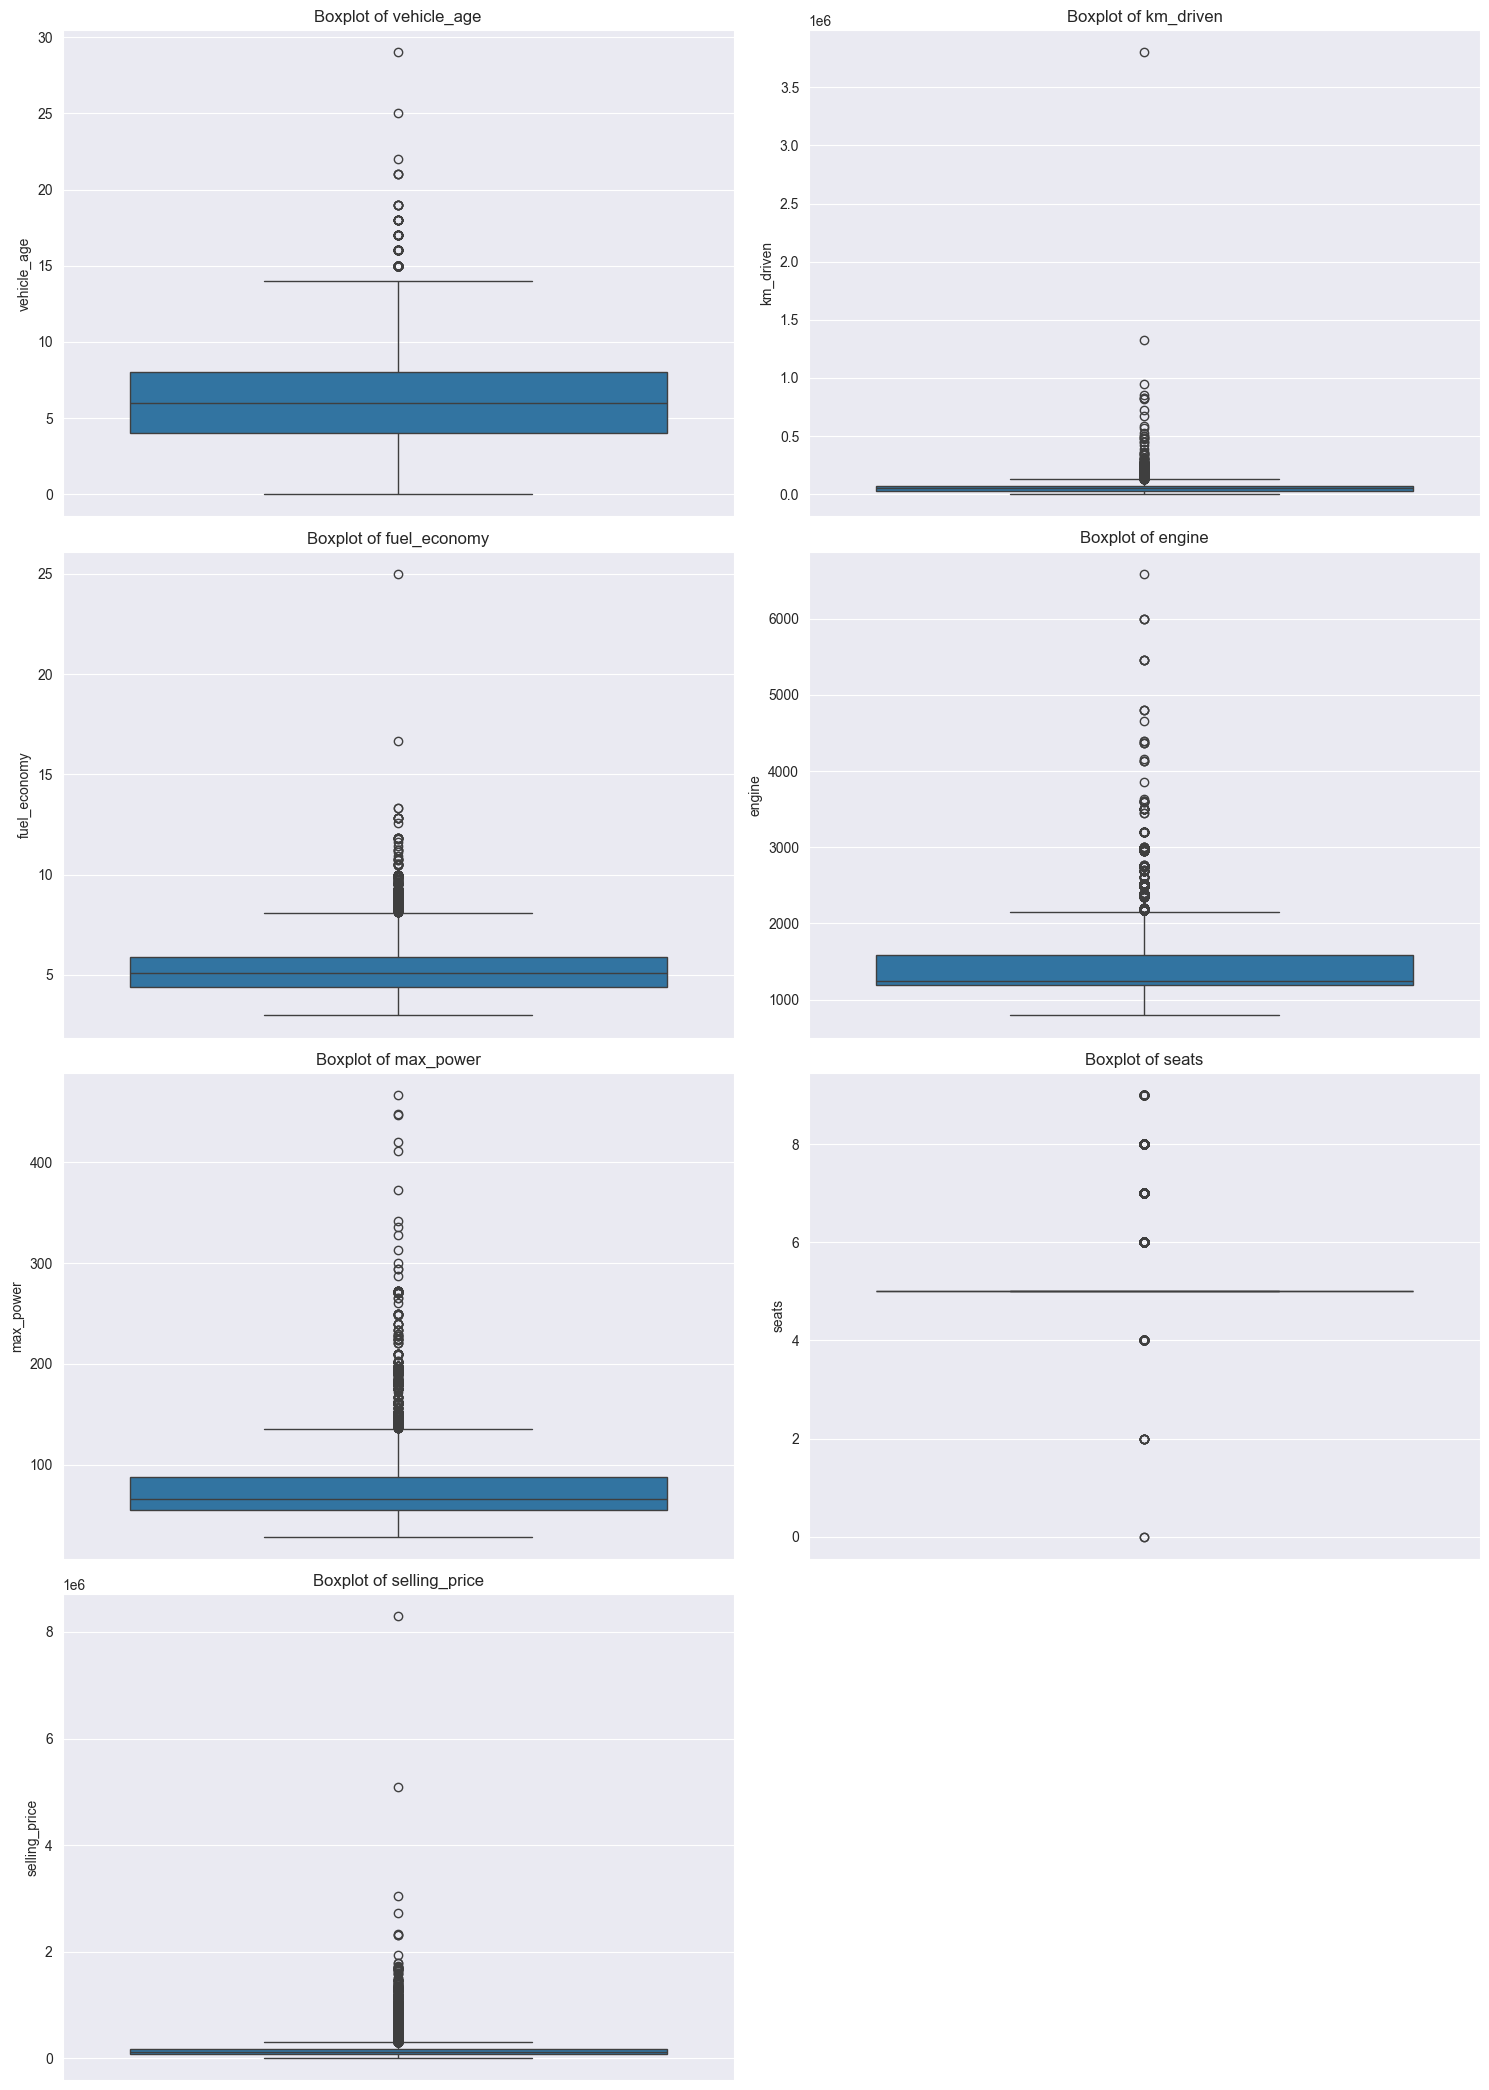

In [11]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots
fig, axes = plt.subplots(nrows=(len(numeric_columns) + 1) // 2, ncols=2, figsize=(15, len(numeric_columns) * 3))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')

# Remove any extra axes if the number of plots is less than the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [12]:
def cap_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Cap outliers
    column = column.apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return column

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# List to keep track of columns with capped outliers
outlier_columns = []

# Process each numeric column
for col in numeric_columns:
    # Cap outliers
    capped_column = cap_outliers_iqr(df[col])
    # Check if there were any changes
    if not capped_column.equals(df[col]):
        outlier_columns.append(col)
    # Update the dataframe with capped values
    df[col] = capped_column

print('Columns with outliers capped:', outlier_columns)
print('Done!')

Columns with outliers capped: ['vehicle_age', 'km_driven', 'fuel_economy', 'engine', 'max_power', 'seats', 'selling_price']
Done!


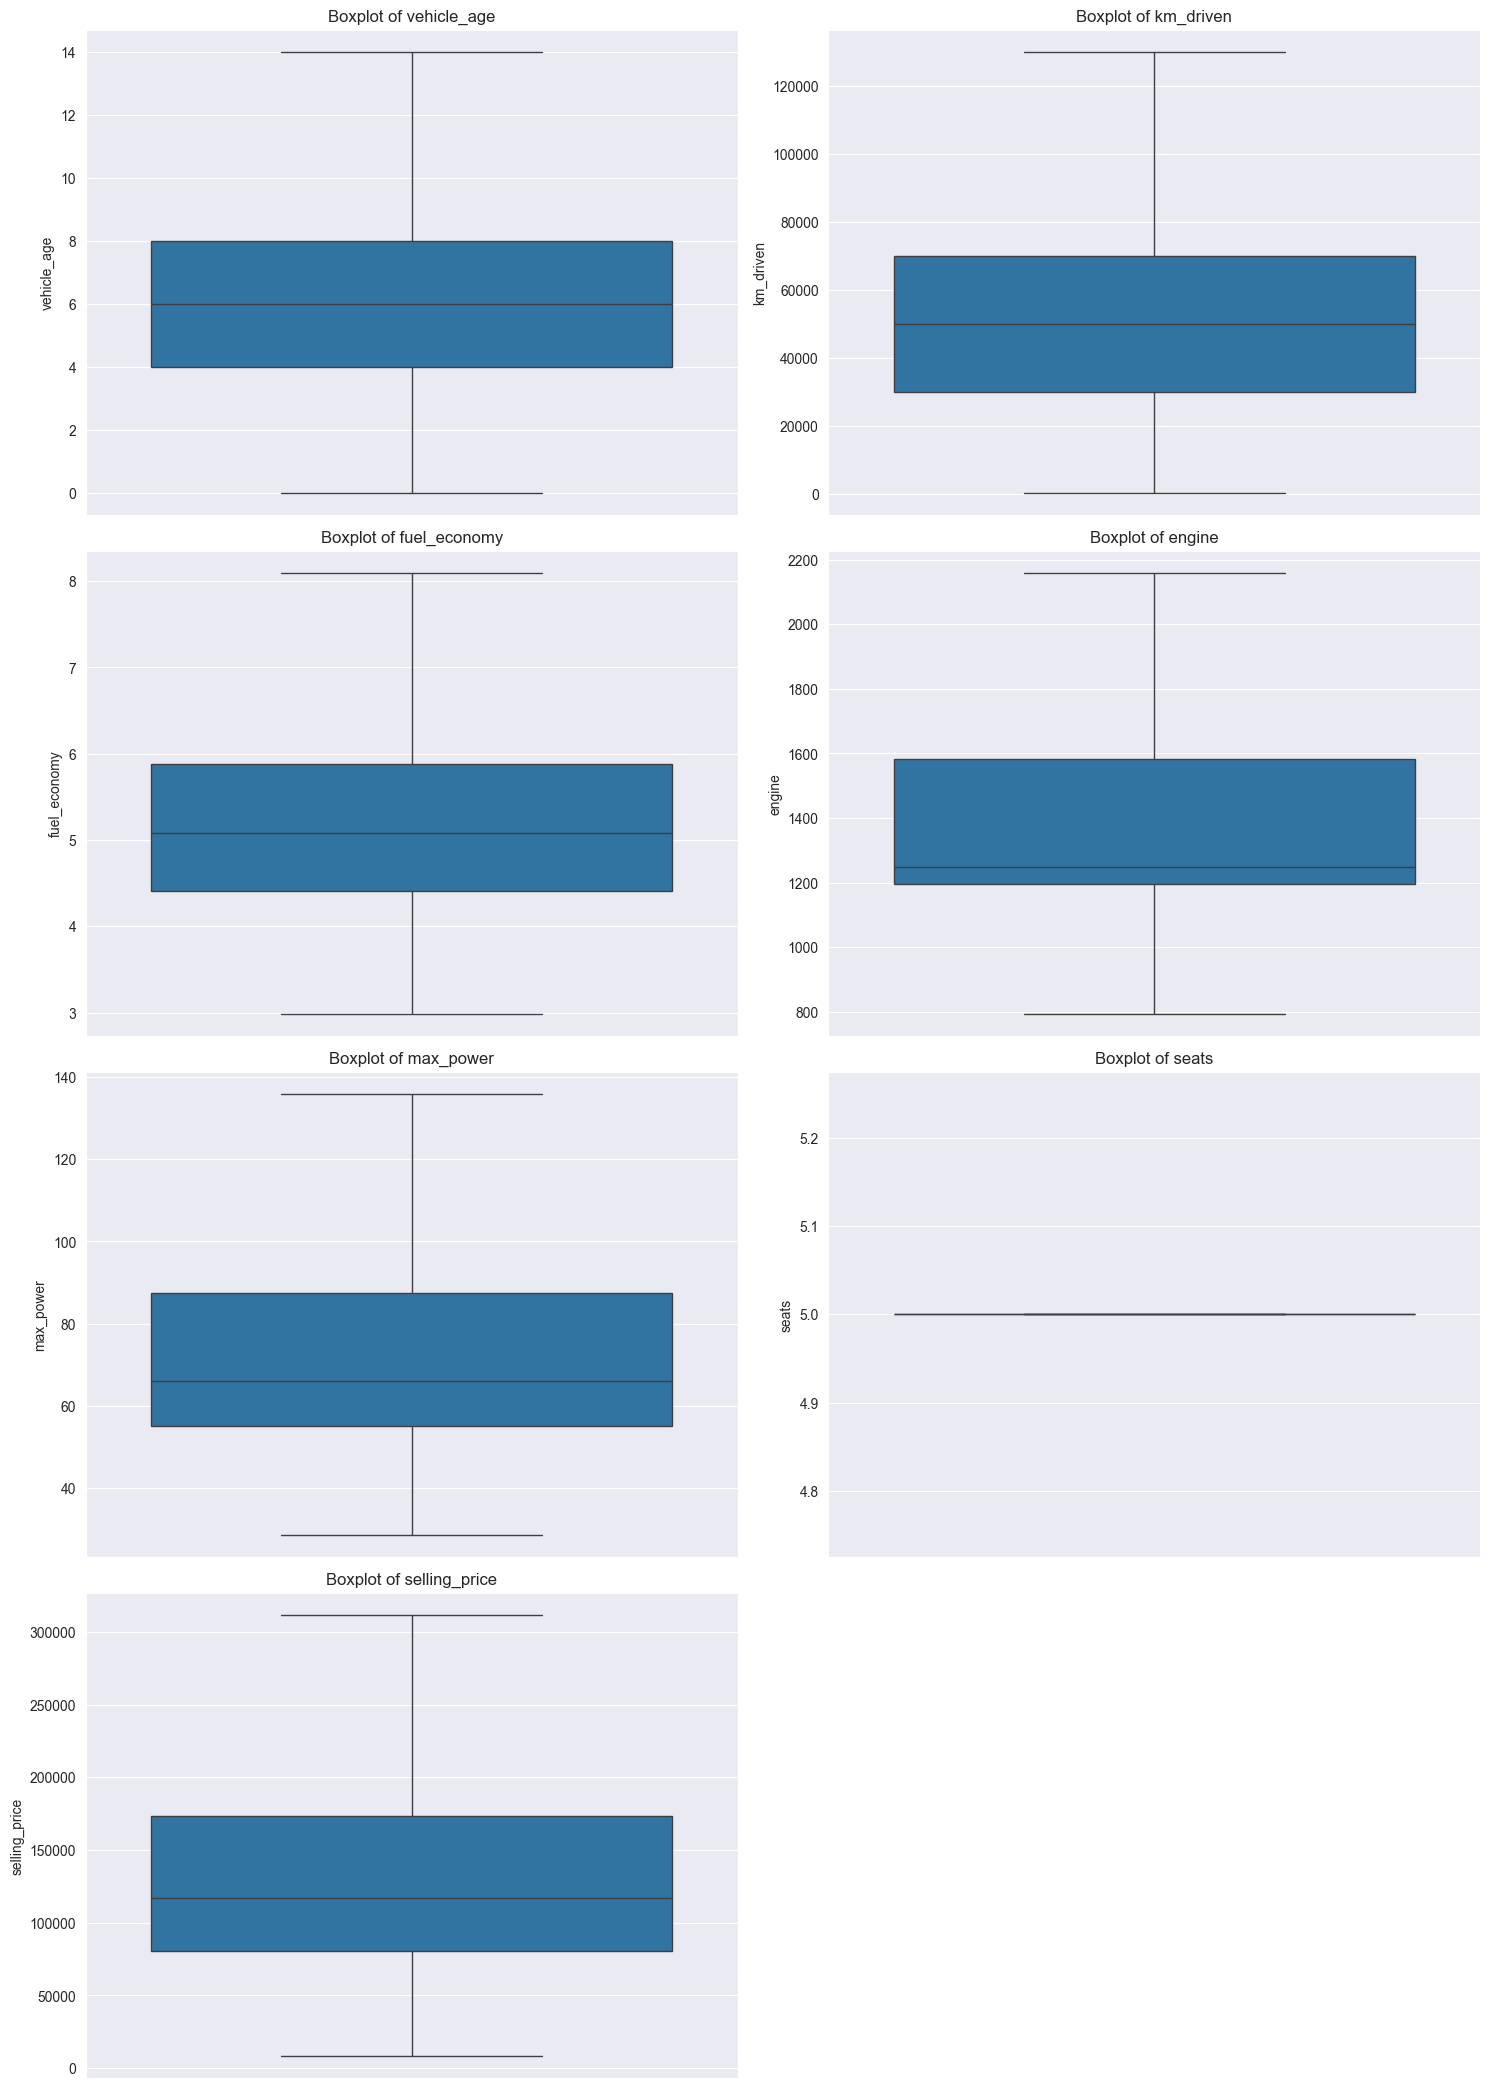

In [13]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots
fig, axes = plt.subplots(nrows=(len(numeric_columns) + 1) // 2, ncols=2, figsize=(15, len(numeric_columns) * 3))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')

# Remove any extra axes if the number of plots is less than the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## 5. Encoding

+ Categorical variables have to be converted from string values to numerical variables
+ We will be using Target Encoding

In [14]:
df['seats'].nunique()

1

In [15]:
cols = df.select_dtypes(include=['object', 'category']).columns

for col in cols:
    print("There is a total of " + str(df[col].nunique()) + " elements in the "+ col + " column.")

There is a total of 32 elements in the brand column.
There is a total of 120 elements in the model column.
There is a total of 3 elements in the seller_type column.
There is a total of 5 elements in the fuel_type column.
There is a total of 2 elements in the transmission_type column.


In [16]:
df1 = df.drop(['model', 'seats', 'car_name'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              15411 non-null  object 
 1   vehicle_age        15411 non-null  float64
 2   km_driven          15411 non-null  float64
 3   seller_type        15411 non-null  object 
 4   fuel_type          15411 non-null  object 
 5   transmission_type  15411 non-null  object 
 6   fuel_economy       15411 non-null  float64
 7   engine             15411 non-null  float64
 8   max_power          15411 non-null  float64
 9   selling_price      15411 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.3+ MB


In [17]:
df1.columns

Index(['brand', 'vehicle_age', 'km_driven', 'seller_type', 'fuel_type',
       'transmission_type', 'fuel_economy', 'engine', 'max_power',
       'selling_price'],
      dtype='object')

In [18]:
# Apply one-hot encoding for categorical variables
ord = OrdinalEncoder()
df1 = pd.get_dummies(df1, columns=['seller_type', 'fuel_type', 'transmission_type'], drop_first=True)
df1["brand"] = ord.fit_transform(df1[["brand"]])
df1['brand'] = df1['brand'].astype('category')

print('One-hot encoding done!')

# Check the first few rows of the dataframe to verify
df1.head()


One-hot encoding done!


,brand,vehicle_age,km_driven,fuel_economy,engine,max_power,selling_price,seller_type_Individual,seller_type_Trustmark Dealer,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Manual
0,18.0,9.0,120000.0,5.076142,796.0,34.526473,25200.0,True,False,False,False,False,True,True
1,8.0,5.0,20000.0,5.291005,1197.0,61.148397,115500.0,True,False,False,False,False,True,True
2,8.0,11.0,60000.0,5.882353,1197.0,59.656972,45150.0,True,False,False,False,False,True,True
3,18.0,9.0,37000.0,4.780115,998.0,50.037286,47460.0,True,False,False,False,False,True,True
4,6.0,6.0,30000.0,4.391744,1498.0,73.519761,119700.0,False,False,True,False,False,False,True


In [19]:
h = np.sort(df['brand'].unique())
h = h.tolist()
h[10:32]

['Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land Rover',
 'Lexus',
 'MG',
 'Mahindra',
 'Maruti',
 'Maserati',
 'Mercedes-AMG',
 'Mercedes-Benz',
 'Mini',
 'Nissan',
 'Porsche',
 'Renault',
 'Rolls-Royce',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

## 6. Checking for Multicollinearity

In [20]:
# Select features excluding the target variable 'selling_price'
X = df1.drop(columns=['selling_price'])
y = df1['selling_price']

# Standardize the features to ensure consistent scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a dataframe to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display the VIF values
print(vif_data)


                         Feature        VIF
0                          brand   1.130381
1                    vehicle_age   1.606140
2                      km_driven   1.747120
3                   fuel_economy   3.915808
4                         engine   8.536321
5                      max_power   4.586648
6         seller_type_Individual   1.089569
7   seller_type_Trustmark Dealer   1.022394
8               fuel_type_Diesel  14.349927
9             fuel_type_Electric   1.020478
10                 fuel_type_LPG   1.175358
11              fuel_type_Petrol  14.221570
12      transmission_type_Manual   1.535729


In [21]:
# Create a new feature combining 'engine' and 'max_power'
X['kW_per_CC'] = X['max_power'] / X['engine'] # kW/CC

# Drop the original 'engine' and 'max_power' features and the fuel_fype_Diesel Column
X = X.drop(columns=['engine', 'max_power', 'fuel_type_Diesel'])

In [22]:
# Standardize the features to ensure consistent scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a dataframe to store VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Display the VIF values
print(vif_data)

                         Feature       VIF
0                          brand  1.103891
1                    vehicle_age  1.577347
2                      km_driven  1.739770
3                   fuel_economy  1.264577
4         seller_type_Individual  1.085196
5   seller_type_Trustmark Dealer  1.018940
6             fuel_type_Electric  1.002321
7                  fuel_type_LPG  1.014912
8               fuel_type_Petrol  1.274778
9       transmission_type_Manual  1.439206
10                     kW_per_CC  1.472258


## 7. Feature Importance

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   brand                         15411 non-null  category
 1   vehicle_age                   15411 non-null  float64 
 2   km_driven                     15411 non-null  float64 
 3   fuel_economy                  15411 non-null  float64 
 4   seller_type_Individual        15411 non-null  bool    
 5   seller_type_Trustmark Dealer  15411 non-null  bool    
 6   fuel_type_Electric            15411 non-null  bool    
 7   fuel_type_LPG                 15411 non-null  bool    
 8   fuel_type_Petrol              15411 non-null  bool    
 9   transmission_type_Manual      15411 non-null  bool    
 10  kW_per_CC                     15411 non-null  float64 
dtypes: bool(6), category(1), float64(4)
memory usage: 708.6 KB


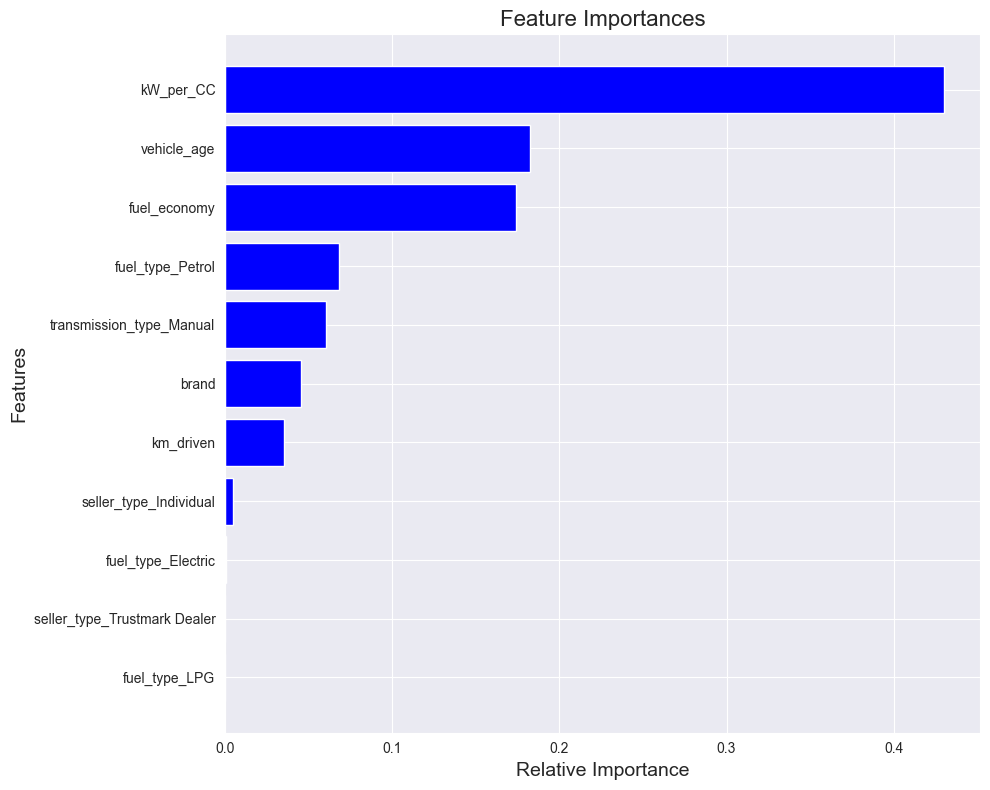

Selected features based on ANOVA, RFE, and Feature Importance:
['kW_per_CC', 'transmission_type_Manual', 'brand', 'km_driven', 'fuel_type_Petrol', 'seller_type_Individual', 'fuel_economy', 'vehicle_age']


In [24]:
# Feature selection using ANOVA F-test for regression
select_k_best = SelectKBest(f_regression, k=7).fit(X, y)
X_selected_kbest = select_k_best.transform(X)
selected_features_kbest = X.columns[select_k_best.get_support()]

# Feature selection using RFE (Recursive Feature Elimination)
model = RandomForestRegressor()  # Using RandomForestRegressor for regression task
rfe = RFE(model, n_features_to_select=7)
fit = rfe.fit(X, y)
selected_features_rfe = X.columns[fit.support_]

# Feature selection using feature importance from RandomForest
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[-8:]
selected_features_importance = X.columns[indices]

# Combine selected features from all methods
selected_features = list(set(selected_features_kbest).union(selected_features_rfe).union(selected_features_importance))

# Plot feature importances
indices = np.argsort(importances)
plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=16)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

print("Selected features based on ANOVA, RFE, and Feature Importance:")
print(selected_features)


In [25]:
X = X[selected_features]

print('Done!')

Done!


## 8. Train/Test Split

In [26]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (10787, 8), y_train shape: (10787,)
X_test shape: (4624, 8), y_test shape: (4624,)


In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10787 entries, 8218 to 9295
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   kW_per_CC                 10787 non-null  float64 
 1   transmission_type_Manual  10787 non-null  bool    
 2   brand                     10787 non-null  category
 3   km_driven                 10787 non-null  float64 
 4   fuel_type_Petrol          10787 non-null  bool    
 5   seller_type_Individual    10787 non-null  bool    
 6   fuel_economy              10787 non-null  float64 
 7   vehicle_age               10787 non-null  float64 
dtypes: bool(3), category(1), float64(4)
memory usage: 464.8 KB


## 9. Feature Scaling

In [28]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10787 entries, 8218 to 9295
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   kW_per_CC                 10787 non-null  float64 
 1   transmission_type_Manual  10787 non-null  bool    
 2   brand                     10787 non-null  category
 3   km_driven                 10787 non-null  float64 
 4   fuel_type_Petrol          10787 non-null  bool    
 5   seller_type_Individual    10787 non-null  bool    
 6   fuel_economy              10787 non-null  float64 
 7   vehicle_age               10787 non-null  float64 
dtypes: bool(3), category(1), float64(4)
memory usage: 464.8 KB


In [30]:
np.save('X_train_scaled.npy', X_train_scaled)
np.save('Y_train.npy', y_train)

# Model Creation

### 1. Multiple Linear Regression

##### a. Ridge Regression

In [33]:
# Initialize and set up the Ridge Regression model with hyperparameter tuning
ridge = Ridge()  # No need to specify alpha initially

# Define the parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]  # Regularization strength
}

# Set up K-Fold cross-validation (you can change the number of splits if needed)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with KFold
ridge_grid_search = GridSearchCV(estimator=ridge,
                                 param_grid=param_grid,
                                 cv=kf,
                                 scoring='neg_mean_squared_error',
                                 n_jobs=-1,
                                 verbose=2)

# Fit the GridSearchCV
ridge_grid_search.fit(X_train_scaled, y_train)

# Get the best model from GridSearchCV
best_ridge_model = ridge_grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

# Calculate performance metrics for Ridge Regression
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero by replacing zeros in y_test with a small number
y_test_nonzero = np.where(y_test == 0, 1e-10, y_test)
mape_ridge = np.mean(np.abs((y_test_nonzero - y_pred_ridge) / y_test_nonzero)) * 100

# Print performance metrics
print(f"\nRidge Regression:")
print(f'Best Hyperparameters: {ridge_grid_search.best_params_}')
print(f'Mean Absolute Error (MAE): {ridge_mae:.2f}')
print(f'Mean Squared Error (MSE): {ridge_mse:.2f}')
print(f'R-squared (R²): {ridge_r2:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_ridge:.2f}%')

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Ridge Regression:
Best Hyperparameters: {'alpha': 1.0}
Mean Absolute Error (MAE): 28560.14
Mean Squared Error (MSE): 1402903551.45
R-squared (R²): 0.78
Mean Absolute Percentage Error (MAPE): 28.13%


##### b. Lasso Regression

In [34]:
# Initialize and set up the Lasso Regression model with hyperparameter tuning
lasso = Lasso()  # No need to specify alpha initially

# Define the parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0]  # Regularization strength
}

# Set up K-Fold cross-validation (you can adjust n_splits as needed)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with KFold
lasso_grid_search = GridSearchCV(estimator=lasso,
                                 param_grid=param_grid,
                                 cv=kf,
                                 scoring='neg_mean_squared_error',
                                 n_jobs=-1,
                                 verbose=2)

# Fit the GridSearchCV
lasso_grid_search.fit(X_train_scaled, y_train)

# Get the best model from GridSearchCV
best_lasso_model = lasso_grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_lasso = best_lasso_model.predict(X_test_scaled)

# Calculate performance metrics for Lasso Regression
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero by replacing zeros in y_test with a small number
y_test_nonzero = np.where(y_test == 0, 1e-10, y_test)
mape_lasso = np.mean(np.abs((y_test_nonzero - y_pred_lasso) / y_test_nonzero)) * 100

# Print performance metrics
print(f"\nLasso Regression:")
print(f'Best Hyperparameters: {lasso_grid_search.best_params_}')
print(f'Mean Absolute Error (MAE): {lasso_mae:.2f}')
print(f'Mean Squared Error (MSE): {lasso_mse:.2f}')
print(f'R-squared (R²): {lasso_r2:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_lasso:.2f}%')

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Lasso Regression:
Best Hyperparameters: {'alpha': 1.0}
Mean Absolute Error (MAE): 28560.09
Mean Squared Error (MSE): 1402902417.76
R-squared (R²): 0.78
Mean Absolute Percentage Error (MAPE): 28.14%


### 2. Random Forest

In [35]:
# Initialize the RandomForestRegressor model
rf = RandomForestRegressor(warm_start=True)

# Set up a hyperparameter grid for tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   cv=3,
                                   n_iter=10,
                                   scoring='neg_mean_squared_error',
                                   n_jobs=-1,
                                   random_state=42,
                                   verbose=2)
random_search_rf.fit(X_train_scaled, y_train)

# Get the best model from RandomizedSearchCV
best_model = random_search_rf.best_estimator_

# Perform cross-validation with 3 folds
cv_scores = cross_val_score(best_model, X, y, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
mean_cv_score = np.mean(cv_scores)

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculate performance metrics
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero by replacing zeros in y_test with a small number
y_test_nonzero = np.where(y_test == 0, 1e-10, y_test)
mape_rf = np.mean(np.abs((y_test_nonzero - y_pred) / y_test_nonzero)) * 100

# Print performance metrics
print(f'\nRandom Forest:')
print(f'Best Hyperparameters: {random_search_rf.best_params_}')
print(f'Mean Absolute Error (MAE): {rf_mae:.2f}')
print(f'Mean Squared Error (MSE): {rf_mse:.2f}')
print(f'R-squared (R²): {rf_r2:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_rf:.2f}%')
print(f'Mean Cross-Validation Score (Negative MSE): {-mean_cv_score:.2f}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Random Forest:
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Mean Absolute Error (MAE): 14294.71
Mean Squared Error (MSE): 429694354.34
R-squared (R²): 0.93
Mean Absolute Percentage Error (MAPE): 13.12%
Mean Cross-Validation Score (Negative MSE): 430356555.68


### 3. XG-Boost

In [36]:
# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor()

# Set up a reduced hyperparameters grid for tuning
param_dist_xgb = {
    'n_estimators': [100, 200, 300],     # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1], # Learning rate for shrinking the contribution of each tree
    'max_depth': [3, 5, 7],             # Maximum tree depth for base learners
    'subsample': [0.7, 0.8, 1.0],       # Subsample ratio of the training instances
    'colsample_bytree': [0.7, 0.8, 1.0],# Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],             # Minimum loss reduction required to make a further partition on a leaf node
    'reg_alpha': [0, 0.1, 0.5],         # L1 regularization term on weights
    'reg_lambda': [1, 1.5, 2.0]         # L2 regularization term on weights
}

# Initialize RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    cv=3,
    n_iter=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the RandomizedSearchCV
random_search_xgb.fit(X_train_scaled, y_train)

# Get the best model from RandomizedSearchCV
best_xgb_model = random_search_xgb.best_estimator_

# Perform cross-validation with 3 folds
cv_scores_xgb = cross_val_score(best_xgb_model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
mean_cv_score_xgb = np.mean(cv_scores_xgb)

# Make predictions on the test set
y_pred_xgb = best_xgb_model.predict(X_test_scaled)

# Calculate performance metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero by replacing zeros in y_test with a small number
y_test_nonzero = np.where(y_test == 0, 1e-10, y_test)
mape_xgb = np.mean(np.abs((y_test_nonzero - y_pred_xgb) / y_test_nonzero)) * 100

# Print performance metrics
print(f'\nXGBoost:')
print(f'Best Hyperparameters: {random_search_xgb.best_params_}')
print(f'Mean Absolute Error (MAE): {mae_xgb:.2f}')
print(f'Mean Squared Error (MSE): {mse_xgb:.2f}')
print(f'R-squared (R²): {r2_xgb:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_xgb:.2f}%')
print(f'Mean Cross-Validation Score (Negative MSE): {-mean_cv_score_xgb:.2f}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits

XGBoost:
Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 2.0, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.7}
Mean Absolute Error (MAE): 13955.12
Mean Squared Error (MSE): 398711274.51
R-squared (R²): 0.94
Mean Absolute Percentage Error (MAPE): 12.66%
Mean Cross-Validation Score (Negative MSE): 417647412.06


### 4. Gradient Booster

In [37]:
# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)

# Set up hyperparameters grid for Gradient Boosting tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize RandomizedSearchCV for Gradient Boosting
random_search_gbr = RandomizedSearchCV(
    estimator=gbr_model,
    param_distributions=param_dist,
    cv=3,
    n_iter=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the model using RandomizedSearchCV
random_search_gbr.fit(X_train_scaled, y_train)

# Get the best model from RandomizedSearchCV
best_gbr_model = random_search_gbr.best_estimator_

# Perform cross-validation with 3 folds
cv_scores_gbr = cross_val_score(best_gbr_model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
mean_cv_score_gbr = np.mean(cv_scores_gbr)

# Make predictions on the test set
y_pred_gbr = best_gbr_model.predict(X_test_scaled)

# Calculate performance metrics
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero by replacing zeros in y_test with a small number
y_test_nonzero = np.where(y_test == 0, 1e-10, y_test)
mape_gbr = np.mean(np.abs((y_test_nonzero - y_pred_gbr) / y_test_nonzero)) * 100

# Print performance metrics
print(f'\nGradient Boosting Regressor:')
print(f'Best Hyperparameters: {random_search_gbr.best_params_}')
print(f'Mean Absolute Error (MAE): {mae_gbr:.2f}')
print(f'Mean Squared Error (MSE): {mse_gbr:.2f}')
print(f'R-squared (R²): {r2_gbr:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_gbr:.2f}%')
print(f'Mean Cross-Validation Score (Negative MSE): {-mean_cv_score_gbr:.2f}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Gradient Boosting Regressor:
Best Hyperparameters: {'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}
Mean Absolute Error (MAE): 14396.35
Mean Squared Error (MSE): 422958733.05
R-squared (R²): 0.93
Mean Absolute Percentage Error (MAPE): 12.92%
Mean Cross-Validation Score (Negative MSE): 430396722.27


### 5. KNN Regressor

In [38]:
# Initialize the K-Neighbors Regressor model
knn_model = KNeighborsRegressor()

# Set up hyperparameters grid for K-Neighbors Regressor tuning
param_dist_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize RandomizedSearchCV for K-Neighbors Regressor
random_search_knn = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist_knn,
    cv=3,
    n_iter=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the model using RandomizedSearchCV
random_search_knn.fit(X_train_scaled, y_train)

# Get the best model from RandomizedSearchCV
best_knn_model = random_search_knn.best_estimator_

# Perform cross-validation with 3 folds
cv_scores_knn = cross_val_score(best_knn_model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
mean_cv_score_knn = np.mean(cv_scores_knn)

# Make predictions on the test set
y_pred_knn = best_knn_model.predict(X_test_scaled)

# Calculate performance metrics for K-Neighbors Regressor
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero by replacing zeros in y_test with a small number
y_test_nonzero = np.where(y_test == 0, 1e-10, y_test)
mape_knn = np.mean(np.abs((y_test_nonzero - y_pred_knn) / y_test_nonzero)) * 100

# Print performance metrics for K-Neighbors Regressor
print(f'\nK-Neighbors Regressor:')
print(f'Best Hyperparameters: {random_search_knn.best_params_}')
print(f'Mean Absolute Error (MAE): {mae_knn:.2f}')
print(f'Mean Squared Error (MSE): {mse_knn:.2f}')
print(f'R-squared (R²): {r2_knn:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_knn:.2f}%')
print(f'Mean Cross-Validation Score (Negative MSE): {-mean_cv_score_knn:.2f}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits

K-Neighbors Regressor:
Best Hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 7}
Mean Absolute Error (MAE): 16621.31
Mean Squared Error (MSE): 617368009.52
R-squared (R²): 0.90
Mean Absolute Percentage Error (MAPE): 15.33%
Mean Cross-Validation Score (Negative MSE): 602426451.77


### 6. Decision Tree Regressor

In [39]:
# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Set up a hyperparameters grid for Decision Tree tuning
param_dist_dt = {
    'max_depth': [3, 5, 7, 10, None],    # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2'], # Number of features to consider when looking for the best split
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']  # Function to measure the quality of a split
}

# Initialize RandomizedSearchCV for Decision Tree Regressor
random_search_dt = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist_dt,
    cv=3,
    n_iter=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the RandomizedSearchCV
random_search_dt.fit(X_train_scaled, y_train)

# Get the best model from RandomizedSearchCV
best_dt_model = random_search_dt.best_estimator_

# Perform cross-validation with 3 folds
cv_scores_dt = cross_val_score(best_dt_model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
mean_cv_score_dt = np.mean(cv_scores_dt)

# Make predictions on the test set
y_pred_dt = best_dt_model.predict(X_test_scaled)

# Calculate performance metrics
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero by replacing zeros in y_test with a small number
y_test_nonzero = np.where(y_test == 0, 1e-10, y_test)
mape_dt = np.mean(np.abs((y_test_nonzero - y_pred_dt) / y_test_nonzero)) * 100

# Print performance metrics
print(f'\nDecision Tree Regressor:')
print(f'Best Hyperparameters: {random_search_dt.best_params_}')
print(f'Mean Absolute Error (MAE): {mae_dt:.2f}')
print(f'Mean Squared Error (MSE): {mse_dt:.2f}')
print(f'R-squared (R²): {r2_dt:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_dt:.2f}%')
print(f'Mean Cross-Validation Score (Negative MSE): {-mean_cv_score_dt:.2f}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Decision Tree Regressor:
Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None, 'criterion': 'poisson'}
Mean Absolute Error (MAE): 15903.55
Mean Squared Error (MSE): 607873281.31
R-squared (R²): 0.91
Mean Absolute Percentage Error (MAPE): 14.29%
Mean Cross-Validation Score (Negative MSE): 624956126.34


### 7. Multi Layer Perceptron Regressor (type of ANN)

In [40]:
# Initialize the MLP Regressor model
mlp_model = MLPRegressor(random_state=42)

# Set up a hyperparameters grid for MLP tuning
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 100)],  # Number of neurons in each hidden layer
    'activation': ['identity', 'logistic', 'tanh', 'relu'],          # Activation function for hidden layers
    'solver': ['lbfgs', 'sgd', 'adam'],                             # Optimizer
    'alpha': [0.0001, 0.001, 0.01, 0.1],                           # Regularization parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive'],        # Learning rate schedule
    'learning_rate_init': [0.001, 0.01, 0.1]                      # Initial learning rate
}

# Initialize RandomizedSearchCV for MLP Regressor
random_search_mlp = RandomizedSearchCV(
    estimator=mlp_model,
    param_distributions=param_dist_mlp,
    cv=3,
    n_iter=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Fit the RandomizedSearchCV
random_search_mlp.fit(X_train_scaled, y_train)

# Get the best model from RandomizedSearchCV
best_mlp_model = random_search_mlp.best_estimator_

# Perform cross-validation with 3 folds
cv_scores_mlp = cross_val_score(best_mlp_model, X_train_scaled, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
mean_cv_score_mlp = np.mean(cv_scores_mlp)

# Make predictions on the test set
y_pred_mlp = best_mlp_model.predict(X_test_scaled)

# Calculate performance metrics
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Calculate Mean Absolute Percentage Error (MAPE)
mape_mlp = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100

# Print performance metrics
print(f'\nNeural Network Model (MLP Regressor):')
print(f'Best Hyperparameters: {random_search_mlp.best_params_}')
print(f'Mean Absolute Error (MAE): {mae_mlp:.2f}')
print(f'Mean Squared Error (MSE): {mse_mlp:.2f}')
print(f'R-squared (R²): {r2_mlp:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_mlp:.2f}%')
print(f'Mean Cross-Validation Score (Negative MSE): {-mean_cv_score_mlp:.2f}')

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Neural Network Model (MLP Regressor):
Best Hyperparameters: {'solver': 'lbfgs', 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50,), 'alpha': 0.1, 'activation': 'relu'}
Mean Absolute Error (MAE): 21199.33
Mean Squared Error (MSE): 867625901.35
R-squared (R²): 0.86
Mean Absolute Percentage Error (MAPE): 18.14%
Mean Cross-Validation Score (Negative MSE): 812096994.98


# Results

In [41]:
results_df = pd.DataFrame({
    'Model': ['Ridge', 'Lasso', 'Random Forest', 'XG-Boost', 'Gradient Booster', 'KNN', 'Decision Tree', 'MLP'],
    'R-Squared': [ridge_r2, lasso_r2, rf_r2, r2_xgb, r2_gbr, r2_knn, r2_dt, r2_mlp],
    'MAPE': [mape_ridge, mape_lasso, mape_rf, mape_xgb, mape_gbr, mape_knn, mape_dt, mape_mlp],
    'MAE': [ridge_mae, lasso_mae, rf_mae, mae_xgb, mae_gbr, mae_knn, mae_dt, mae_mlp],
    'MSE': [ridge_mse, lasso_mse, rf_mse, mse_xgb, mse_gbr, mse_knn, mse_dt, mse_mlp],
    'Negative MSE': [np.nan, np.nan, -mean_cv_score, -mean_cv_score_xgb, -mean_cv_score_gbr, -mean_cv_score_knn, -mean_cv_score_dt, -mean_cv_score_mlp]
})

results_df.iloc[:, 1:] = results_df.iloc[:, 1:].round(3)
results_df

,Model,R-Squared,MAPE,MAE,MSE,Negative MSE
0,Ridge,0.781,28.135,28560.140,1.402904e+09,NaN
1,Lasso,0.781,28.136,28560.090,1.402902e+09,NaN
2,Random Forest,0.933,13.124,14294.710,4.296944e+08,4.303566e+08
3,XG-Boost,0.938,12.665,13955.125,3.987113e+08,4.176474e+08
4,Gradient Booster,0.934,12.925,14396.354,4.229587e+08,4.303967e+08
5,KNN,0.904,15.329,16621.307,6.173680e+08,6.024265e+08
6,Decision Tree,0.905,14.285,15903.547,6.078733e+08,6.249561e+08
7,MLP,0.865,18.143,21199.334,8.676259e+08,8.120970e+08


#### **Model Interpretations**

R-Squared (R²):

    Interpretation: Indicates the proportion of variance in the dependent variable that can be explained bythe independent variables. Values closer to 1 indicate a better fit.
    Best Model: XG-Boost (R² of 0.938) has the highest R² value, followed closely by Gradient Booster (R² of0.934) and Random Forest (R² of 0.933). All these models indicate a strong fit, with XG-Boostdemonstrating the best ability to explain variance in the data.

Mean Absolute Percentage Error (MAPE):

    Interpretation: Measures the accuracy of a forecasting method by expressing accuracy as a percentage,showing the average absolute percentage error between predicted and actual values. Lower values indicatebetter accuracy.
    Best Model: XG-Boost (MAPE of 12.665) outperforms all models in this category, followed by GradientBooster (MAPE of 12.925) and Random Forest (MAPE of 13.124), indicating better predictive accuracy.

Mean Absolute Error (MAE):

    Interpretation: Represents the average absolute difference between predicted and actual values. Lowervalues indicate better model performance.
    Best Model: XG-Boost (MAE of 13,955.125) has the lowest MAE, making it the best model for minimizingabsolute error, followed by Random Forest (MAE of 14,294.710) and Gradient Booster (MAE of 14,396.354).

Mean Squared Error (MSE):

    Interpretation: Measures the average of the squares of the errors—that is, the average squareddifference between predicted and actual values. Lower values indicate better model performance.
    Best Model: XG-Boost (MSE of 3.987113e+08) has the lowest MSE, indicating it best minimizes the squarederrors compared to other models, including Gradient Booster (MSE of 4.229587e+08) and Random Forest (MSEof 4.296944e+08).

Negative MSE:

    Interpretation: Represents the negative of the mean squared error, used in cross-validation scoringwhere higher values (less negative) indicate better models.
    Best Model: XG-Boost (Negative MSE of 4.176474e+08) leads in this metric, followed by Gradient Booster(Negative MSE of 4.303967e+08) and Random Forest (Negative MSE of 4.303566e+08), confirming its superiorperformance.

# Learning Curves

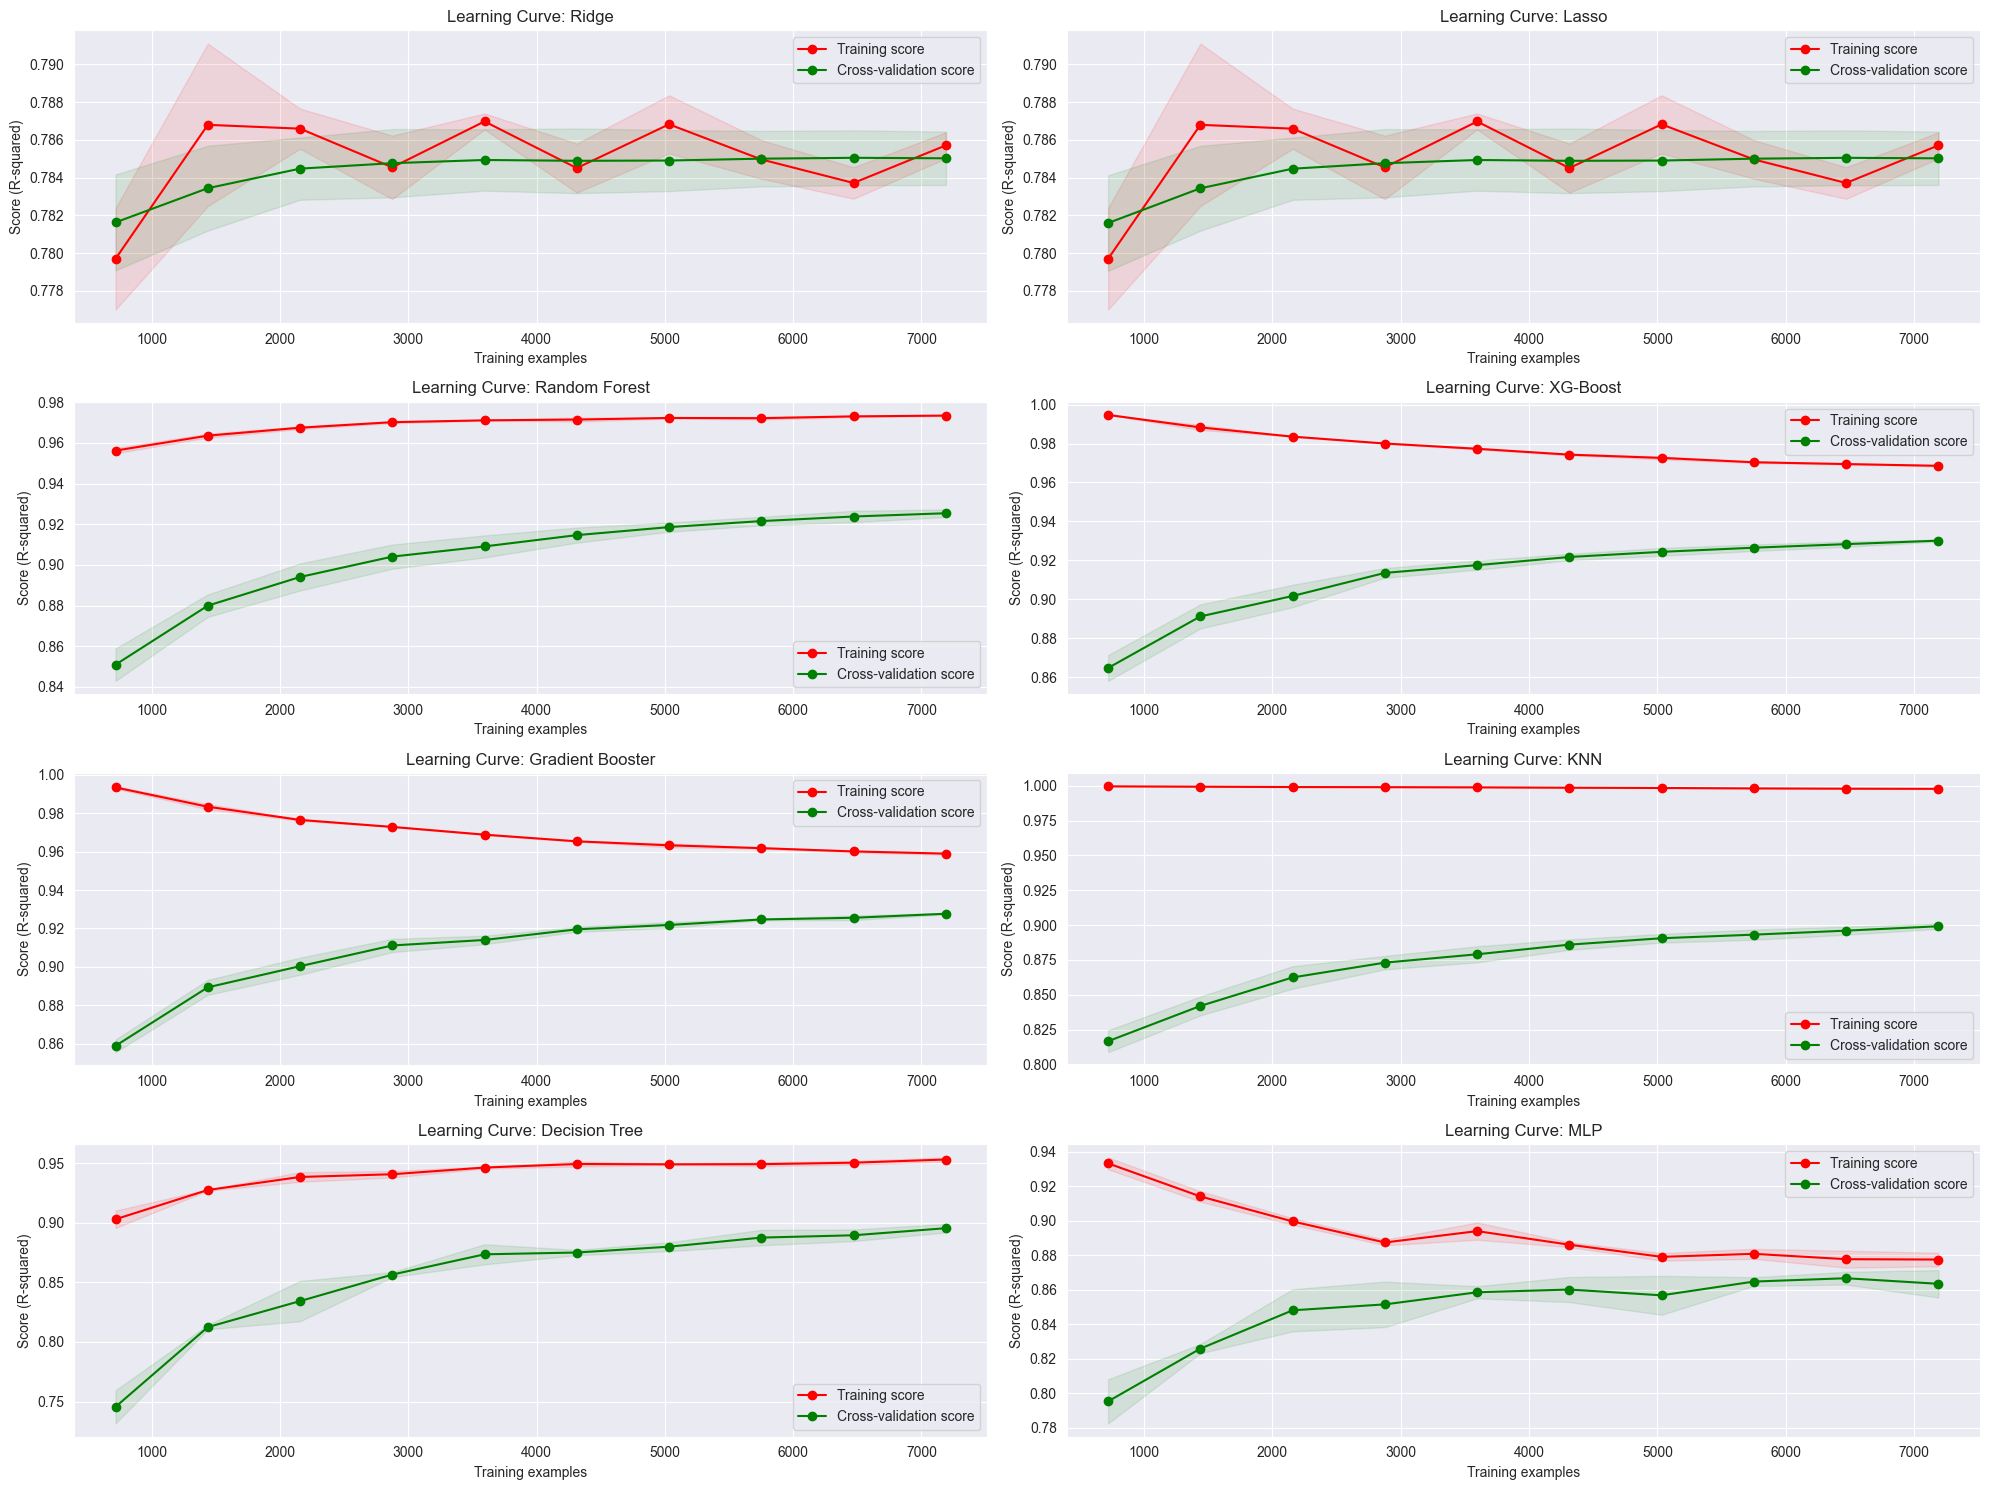

In [ ]:
# Function to plot learning curves for a list of models using R-squared as the metric
def plot_learning_curves_r2(models, model_names, X, y, cv, ax_matrix_shape=(2, 2)):
    # Create subplots for the learning curves
    fig, axs = plt.subplots(ax_matrix_shape[0], ax_matrix_shape[1], figsize=(20, 15))
    axs = axs.ravel()  # Flatten the axis array for easy iteration
    
    for idx, (model, name) in enumerate(zip(models, model_names)):
        # Define the range of training examples to be used
        train_sizes, train_scores, test_scores = learning_curve(
            model, X, y, cv=cv, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
        )

        # Calculate mean and standard deviation of training and test scores
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        # Plot learning curves
        axs[idx].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
        axs[idx].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
        axs[idx].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        axs[idx].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

        # Set labels, title, and grid for each plot
        axs[idx].set_xlabel("Training examples")
        axs[idx].set_ylabel("Score (R-squared)")
        axs[idx].set_title(f'Learning Curve: {name}')
        axs[idx].legend(loc="best")
        axs[idx].grid(True)
    
    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()

# List of models
models = [best_ridge_model, best_lasso_model, best_model, best_xgb_model, best_gbr_model, best_knn_model, best_dt_model, best_mlp_model]  # Replace with your models
model_names = ['Ridge', 'Lasso', 'Random Forest', 'XG-Boost', 'Gradient Booster', 'KNN', 'Decision Tree', 'MLP']

# Plot learning curves for the models
plot_learning_curves_r2(models, model_names, X_train_scaled, y_train, cv=3, ax_matrix_shape=(4, 2))


#### **Learning Curve analysis**

Ridge and Lasso: 
    
    These models exhibit fluctuating performance as more training examples are added. Both models have near-identical learning curves with high variance, which suggests that they may struggle with underfitting, evidenced by lower R² values and higher errors (MAPE, MAE, MSE).

Random Forest: 

    The training curve quickly converges to a high value close to 1, but the cross-validation curve shows that it performs well as the number of training examples increases. The cross-validation score rises but still shows slight underfitting compared to XG-Boost.

XG-Boost: 

    Displays the best performance, with a steadily increasing cross-validation score and a training score that stabilizes at a very high level. This indicates that XG-Boost generalizes well to unseen data, supported by strong results in R², MAPE, MAE, and MSE.

Gradient Booster: 

    Also shows strong performance with a stable cross-validation score and high training score, although slightly behind XG-Boost. The learning curve shows that it closely tracks XG-Boost across all metrics.

KNN: 

    The training curve quickly reaches a high value, but there is a notable gap between the training and cross-validation scores, suggesting some overfitting. While the model has a decent R², it lags in terms of error metrics (MAPE, MAE, MSE).

Decision Tree: 

    Exhibits some overfitting with a large gap between the training score (close to 1) and the cross-validation score. This is consistent with the model's relatively lower performance on MAPE, MAE, and MSE compared to Random Forest and XG-Boost.

MLP (Multi-Layer Perceptron): 

    The learning curves show significant overfitting with a large disparity between the training score and cross-validation score. The model performs worse on error metrics and shows instability with respect to generalization.

#### **Final Decision based on Learning Curves and Metric Results**

    Overall Best Model: XG-Boost

    XG-Boost consistently performs well across all metrics (R², MAPE, MAE, MSE, and Negative MSE), making it the best overall model in terms of predictive accuracy and reliability. While Gradient Booster and Random Forest perform closely in R², XG-Boost outshines them in the other key metrics, establishing it as the most robust model for this analysis.

# Save Model

In [51]:
# Save the model
model.save_model('Best_model.xgb')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [49]:
model_path = 'C:/Users/Admin/Data science/Jupyter Scripts/Capstone/Best_model.pkl'
scaler_path = 'C:/Users/Admin/Data science/Jupyter Scripts/Capstone/scaler.pkl'
model = joblib.load(model_path)
scaler = joblib.load(scaler_path)

In [55]:
def map_brands_to_numbers(brands):
    # Create a mapping of brand names to numbers
    brand_mapping = {brand: index for index, brand in enumerate(brands)}
    return brand_mapping

# List of brands
brands = h

# Map brands to numbers
brand_mapping = map_brands_to_numbers(brands)

# Function to predict car price and return the interval
def predict_car_price_with_interval(model, scaler, y_train, X_train_scaled, confidence=2.326):
    # User input for features
    brand_input = input("Enter Brand: ")
    brand = brand_mapping.get(brand_input)
    if brand is None:
        raise ValueError(f"Brand '{brand_input}' not recognized. Please enter a valid brand.")

    vehicle_year = float(input("Enter vehicle manufacturing year: "))
    km_driven = float(input("Enter kilometers driven: "))
    fuel_economy = float(input("Enter fuel economy: "))
    engine = float(input("Enter engine capacity (in CC): "))
    max_power = float(input("Enter max power (in kW): "))
    
    # Calculate hp, power_per_engine, and vehicle_age
    vehicle_age = 2024 - vehicle_year  # Consider using the current year dynamically
    power_per_engine = max_power / engine

    # User input for categorical features
    seller_type = input("Enter seller type (Individual, Dealer): ")
    fuel_type = input("Enter fuel type (Petrol, Diesel): ")
    transmission_type = input("Enter transmission type (Manual, Automatic): ")

    # One-hot encode categorical variables
    seller_type_encoded = 1 if seller_type == 'Individual' else 0  # Assuming 'Dealer' is the other option
    fuel_type_encoded = 0 if fuel_type == 'Diesel' else 1  # Assuming 'Petrol' is the other option
    transmission_type_encoded = 1 if transmission_type == 'Manual' else 0  # Assuming 'Automatic' is the other option

    # Create a DataFrame from the input features
    input_data = pd.DataFrame({
        'vehicle_age': [vehicle_age],
        'kW_per_CC': [power_per_engine],
        'brand': [brand],
        'seller_type_Individual': [seller_type_encoded],
        'transmission_type_Manual': [transmission_type_encoded],
        'fuel_economy': [fuel_economy],
        'km_driven': [km_driven],
        'fuel_type_Petrol': [fuel_type_encoded]
    })
    
    # Scale the input data
    input_data_scaled = scaler.transform(input_data)  # Use transform instead of fit_transform
    
    # Predict the car price
    predicted_price = model.predict(input_data_scaled)[0]
    
    # Calculate the residuals (differences between predictions and actual prices)
    y_train_pred = model.predict(X_train_scaled)  # Use the scaled training features
    residuals = y_train_pred - y_train  # Calculate residuals
    std_residual = np.std(residuals)  # Standard deviation of residuals

    # Calculate the prediction interval
    margin_of_error = confidence * std_residual  # Margin of error for the interval
    lower_bound = predicted_price - margin_of_error
    upper_bound = predicted_price + margin_of_error
    
    # Recommended price (e.g., using the predicted price directly)
    recommended_price = predicted_price  # This could also be an average or a price strategy

    return {
        'predicted_price': predicted_price,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'recommended_price': recommended_price
    }


In [56]:
# Example:

# Assume model, y_train, and X_train_scaled are defined earlier in your code.
prediction = predict_car_price_with_interval(model=model, scaler=scaler, y_train=y_train, X_train_scaled=X_train_scaled)

# Print the result
print(f'Predicted Car Price: {prediction["predicted_price"]:.2f}')
print(f'99% Prediction Interval: [{prediction["lower_bound"]:.2f}, {prediction["upper_bound"]:.2f}]')

Predicted Car Price: 154453.31
99% Prediction Interval: [120409.23, 188497.40]


In [38]:
df

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,fuel_economy,engine,max_power,seats,selling_price
0,Maruti,Alto,9.0,120000.0,Individual,Petrol,Manual,5.076142,796.0,34.526473,5.0,25200.0
1,Hyundai,Grand,5.0,20000.0,Individual,Petrol,Manual,5.291005,1197.0,61.148397,5.0,115500.0
2,Hyundai,i20,11.0,60000.0,Individual,Petrol,Manual,5.882353,1197.0,59.656972,5.0,45150.0
3,Maruti,Alto,9.0,37000.0,Individual,Petrol,Manual,4.780115,998.0,50.037286,5.0,47460.0
4,Ford,Ecosport,6.0,30000.0,Dealer,Diesel,Manual,4.391744,1498.0,73.519761,5.0,119700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai,i10,9.0,10723.0,Dealer,Petrol,Manual,5.047956,1086.0,50.745712,5.0,52500.0
19540,Maruti,Ertiga,2.0,18000.0,Dealer,Petrol,Manual,5.714286,1373.0,67.934377,5.0,194250.0
19541,Skoda,Rapid,6.0,67000.0,Dealer,Diesel,Manual,4.730369,1498.0,77.196122,5.0,89250.0
19542,Mahindra,XUV500,5.0,130000.0,Dealer,Diesel,Manual,6.250000,2159.5,104.399702,5.0,257250.0


# References

+ Dataset: https://www.kaggle.com/datasets/manishkr1754/cardekho-used-car-data?select=cardekho_dataset.csv